In [ ]:
from google.colab import files

In [ ]:
import os
import pandas as pd
import zipfile

# Extract the ZIP file
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall('archive')  # Extract to 'archive' folder






['Dataset_BUSI_with_GT']
                                          Image_Path  \
0  archive/Dataset_BUSI_with_GT/benign/benign (1)...   
1  archive/Dataset_BUSI_with_GT/benign/benign (10...   
2  archive/Dataset_BUSI_with_GT/benign/benign (10...   
3  archive/Dataset_BUSI_with_GT/benign/benign (10...   
4  archive/Dataset_BUSI_with_GT/benign/benign (10...   

                                           Mask_Path   Label  
0  archive/Dataset_BUSI_with_GT/benign/benign (1)...  benign  
1  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
2  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
3  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
4  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  


In [ ]:
# Set the base path correctly
base_path = "archive/Dataset_BUSI_with_GT"  # Update if the folder name differs
categories = ["benign", "malignant", "normal"]

In [ ]:
# Prepare Data
data = []
for category in categories:
    category_path = os.path.join(base_path, category)

    # Check if the category folder exists
    if not os.path.exists(category_path):
        print(f"Folder not found: {category_path}")
        continue

    files = sorted(os.listdir(category_path))

    for file in files:
        if "_mask" in file:
            continue

        img_path = os.path.join(category_path, file)
        mask_path = os.path.join(category_path, file.replace(".png", "_mask.png"))

        if os.path.exists(mask_path):
            data.append([img_path, mask_path, category])
        else:
            print(f"Mask not found for {img_path}")



In [ ]:


df = pd.DataFrame(data, columns=["Image_Path", "Mask_Path", "Label"])
print(df.head())

                                          Image_Path  \
0  archive/Dataset_BUSI_with_GT/benign/benign (1)...   
1  archive/Dataset_BUSI_with_GT/benign/benign (10...   
2  archive/Dataset_BUSI_with_GT/benign/benign (10...   
3  archive/Dataset_BUSI_with_GT/benign/benign (10...   
4  archive/Dataset_BUSI_with_GT/benign/benign (10...   

                                           Mask_Path   Label  
0  archive/Dataset_BUSI_with_GT/benign/benign (1)...  benign  
1  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
2  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
3  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  
4  archive/Dataset_BUSI_with_GT/benign/benign (10...  benign  


In [ ]:
df.tail()


,Image_Path,Mask_Path,Label
775,archive/Dataset_BUSI_with_GT/normal/normal (95...,archive/Dataset_BUSI_with_GT/normal/normal (95...,normal
776,archive/Dataset_BUSI_with_GT/normal/normal (96...,archive/Dataset_BUSI_with_GT/normal/normal (96...,normal
777,archive/Dataset_BUSI_with_GT/normal/normal (97...,archive/Dataset_BUSI_with_GT/normal/normal (97...,normal
778,archive/Dataset_BUSI_with_GT/normal/normal (98...,archive/Dataset_BUSI_with_GT/normal/normal (98...,normal
779,archive/Dataset_BUSI_with_GT/normal/normal (99...,archive/Dataset_BUSI_with_GT/normal/normal (99...,normal


In [ ]:
df.shape


(780, 3)

In [ ]:
df.columns

Index(['Image_Path', 'Mask_Path', 'Label'], dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  780 non-null    object
 1   Mask_Path   780 non-null    object
 2   Label       780 non-null    object
dtypes: object(3)
memory usage: 18.4+ KB


In [ ]:
df['Label'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [ ]:
df['Label'].value_counts()

,count
Label,
benign,437
malignant,210
normal,133


<ipython-input-29-b72f3113fcce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Label", palette="viridis", ax=ax)


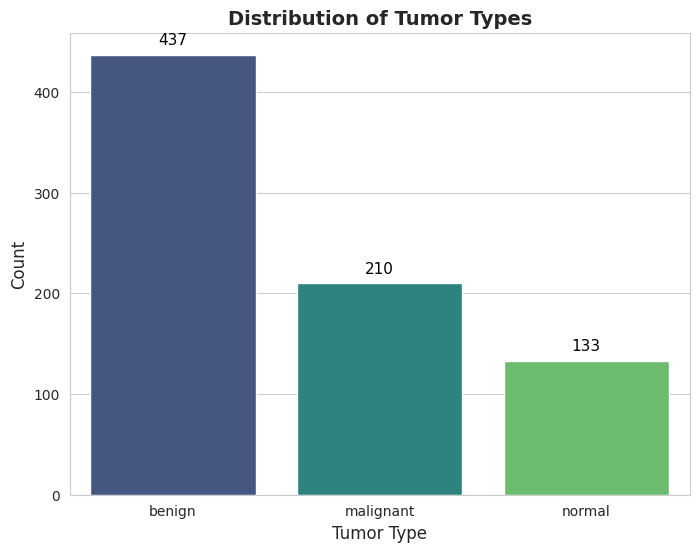

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x="Label", palette="viridis", ax=ax)

ax.set_title("Distribution of Tumor Types", fontsize=14, fontweight='bold')
ax.set_xlabel("Tumor Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.show()

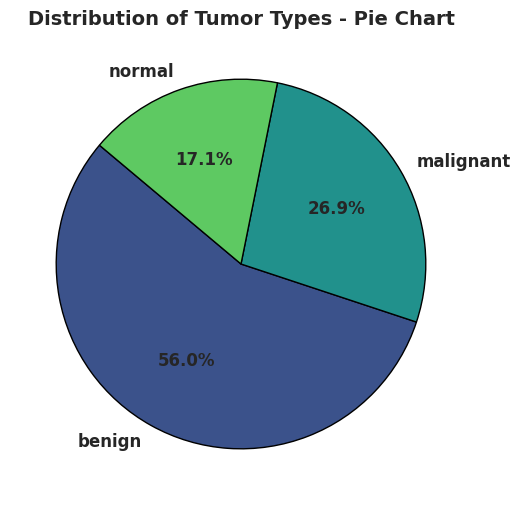

In [ ]:
label_counts = df["Label"].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
colors = sns.color_palette("viridis", len(label_counts))

ax.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%',
       startangle=140, colors=colors, textprops={'fontsize': 12, 'weight': 'bold'},
       wedgeprops={'edgecolor': 'black', 'linewidth': 1})

ax.set_title("Distribution of Tumor Types - Pie Chart", fontsize=14, fontweight='bold')

plt.show()


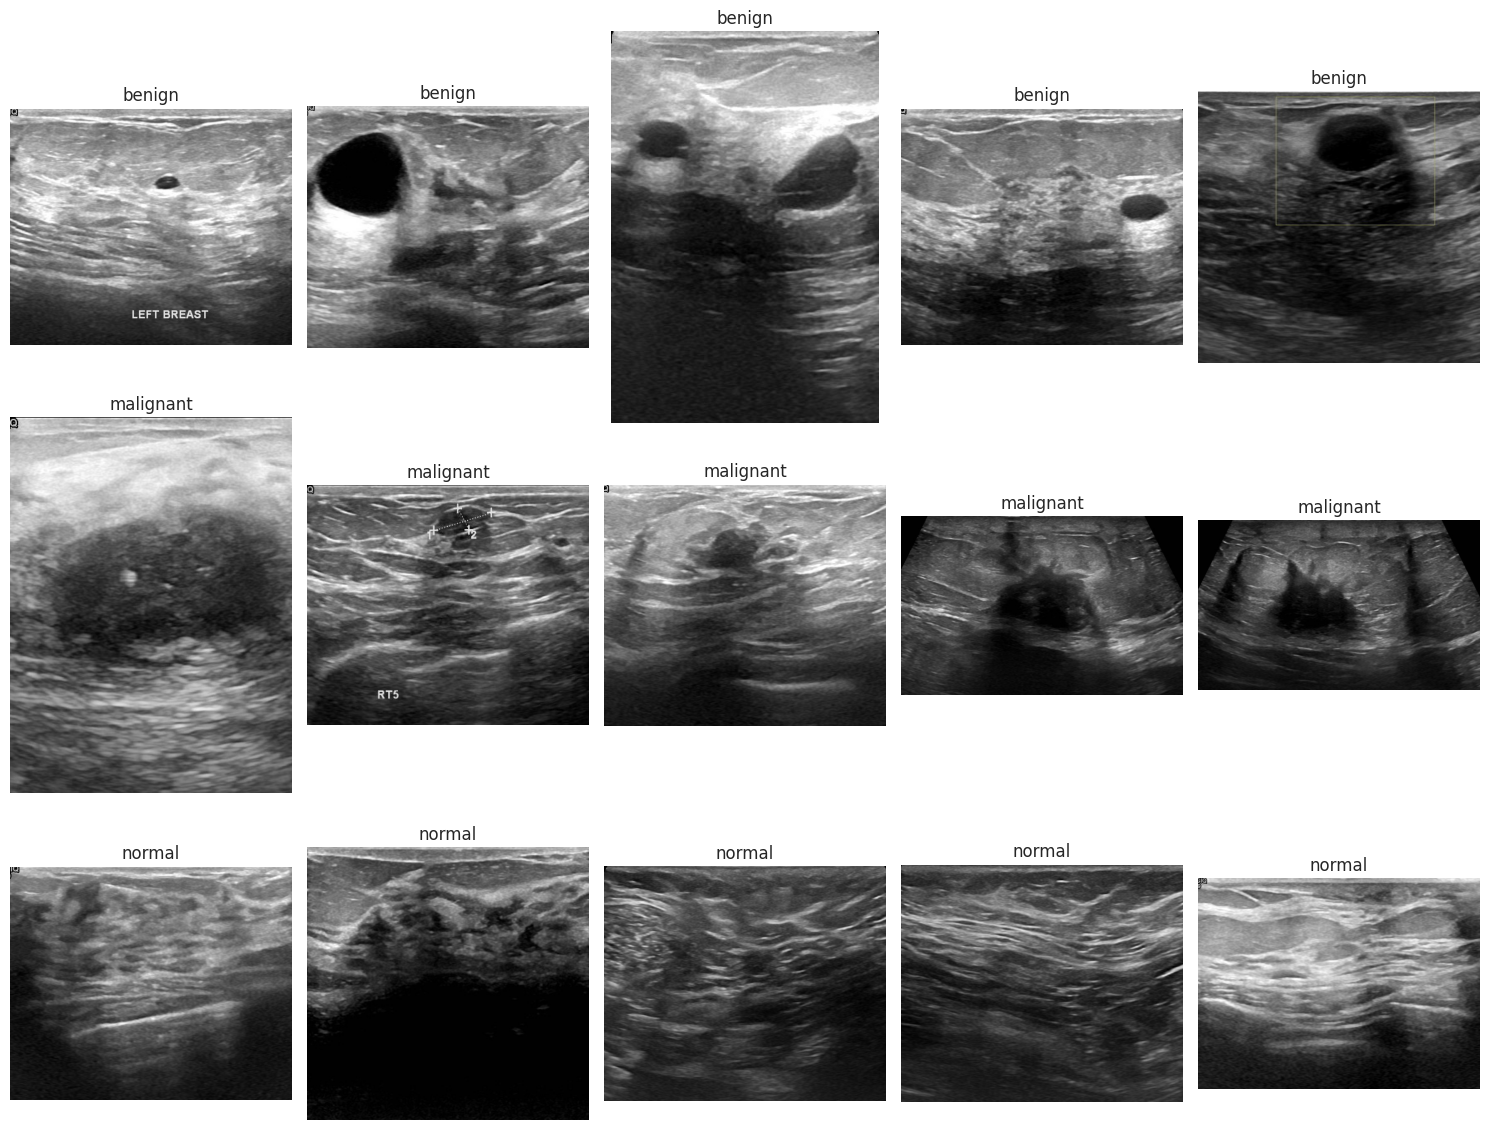

In [ ]:
import cv2

num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df["Label"] == category]["Image_Path"].iloc[:num_images]

    for j, img_path in enumerate(category_images):
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(category)

plt.tight_layout()
plt.show()

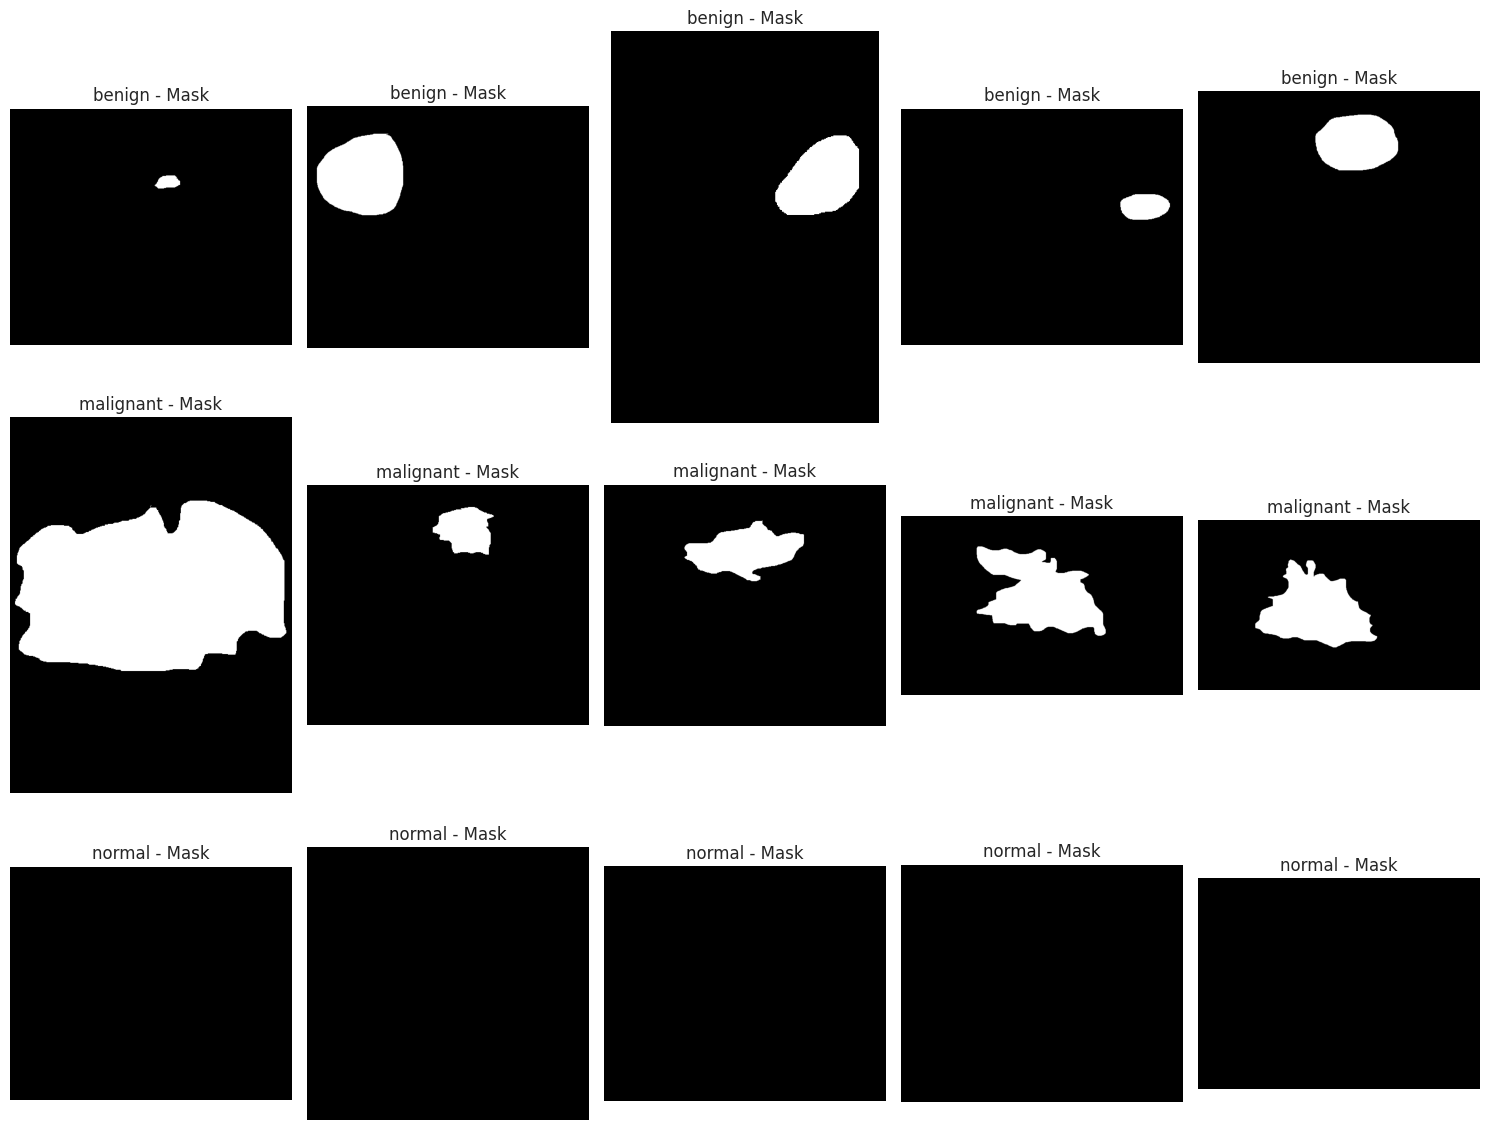

In [ ]:
num_images = 5
plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_masks = df[df["Label"] == category]["Mask_Path"].iloc[:num_images]

    for j, mask_path in enumerate(category_masks):
        mask = cv2.cvtColor(cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE), cv2.COLOR_GRAY2RGB)

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(mask)
        plt.axis("off")
        plt.title(f"{category} - Mask")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load your dataset
df = pd.DataFrame(data, columns=["Image_Path", "Mask_Path", "Label"])

# Shape of features (images) and labels
X = df['Image_Path'].values   # Image paths as features
y = df['Label'].values        # Labels like benign, malignant, normal

print("Features (X) shape:", X.shape)
print("Labels (y) shape:", y.shape)

# 1 Displaying Sample Images from Each Category
def display_images(df, category, n=5):
    sample = df[df['Label'] == category].sample(n)
    plt.figure(figsize=(15, 5))
    for i, path in enumerate(sample['Image_Path'].values):
        img = Image.open(path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    plt.show()





Features (X) shape: (780,)
Labels (y) shape: (780,)


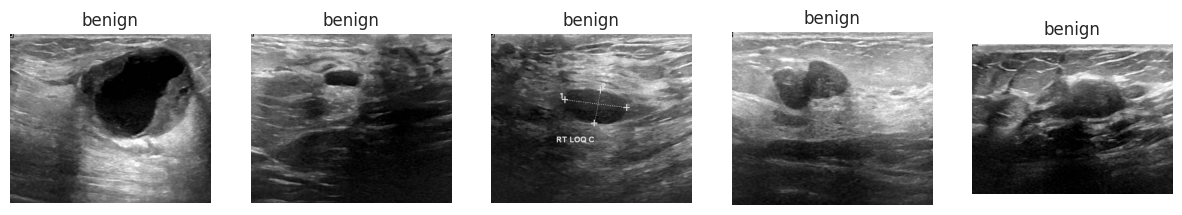

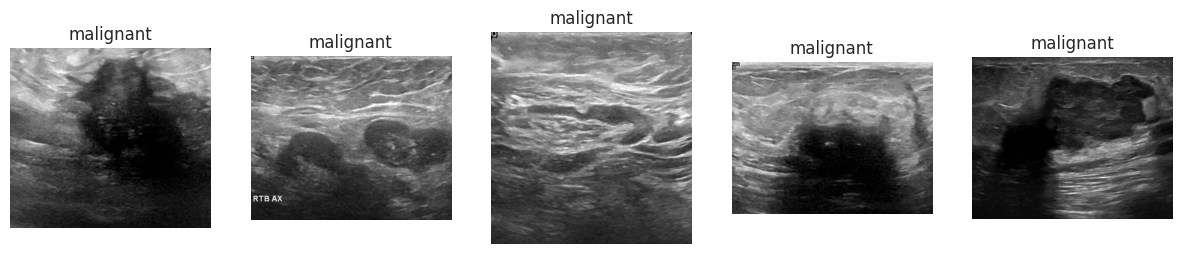

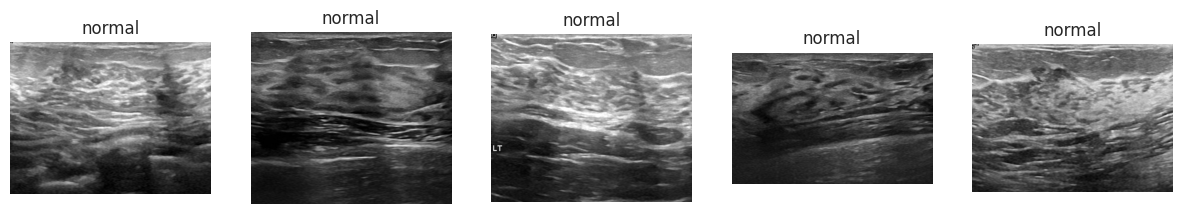

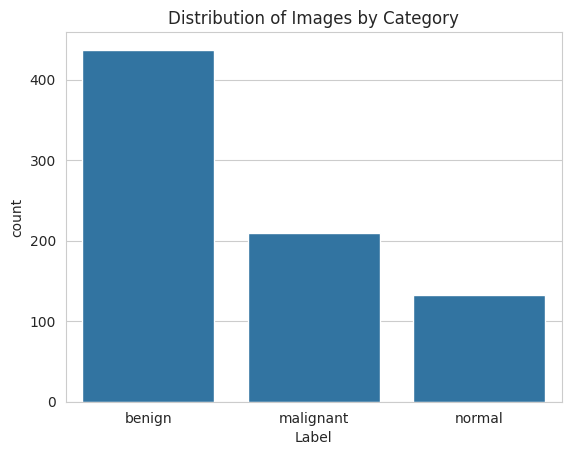

In [ ]:
for category in df['Label'].unique():
    display_images(df, category)

# 2 Distribution of Images per Category (similar to violin plot)
sns.countplot(x='Label', data=df)
plt.title("Distribution of Images by Category")
plt.show()

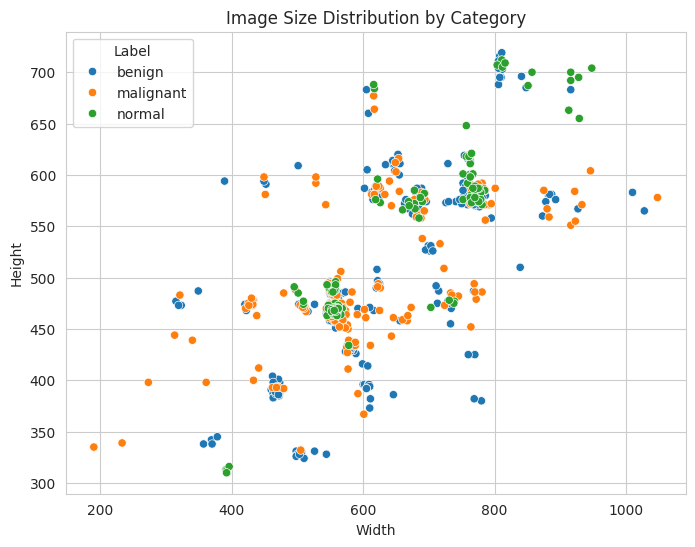

In [ ]:

# 3 Image Size Analysis (replacing pairplot)
image_sizes = []

for path in df['Image_Path']:
    img = Image.open(path)
    image_sizes.append(img.size)  # (width, height)

# Convert to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=["Width", "Height"])

# Scatter plot to visualize image size distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x=sizes_df['Width'], y=sizes_df['Height'], hue=df['Label'])
plt.title("Image Size Distribution by Category")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

In [ ]:
c